#목차 
##1. 데이터 전처리

- 데이터 시각화 및 분석
- 데이터 정규화

##2. 데이터 세트 분리

- 학습데이터 테스트 데이터 분류

##3. 모델학습

- ANN, DNN
- Random forest, KNN

##4. 평가

- 학습으로 예측된 결과 값과 테스트 데이터의 실제 결과 값 비교 후 모델 성능 평가
- accuracy, precision, recall, f1 score, roc_acuc

##5. 조원 기여도

- 데이터 전처리 : 유지원, 천지희, 신동찬, 한봉수
- ANN, DNN : 천지희, 한봉수
- Random forest, KNN : 신동찬, 유지원
- 발표 : 신동찬, 한봉수 

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns



df= pd.read_csv('/content/drive/MyDrive/DataSet/creditcard.csv')

df.drop(['Time'], axis = 1, inplace =True)
df.head()




,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

### Amount 정규화

In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# StanderScaler로 정규화

scaler = StandardScaler()

# 정규화한 Amount 값을 reshape해서 치환
df[['Amount']] = scaler.fit_transform(df[['Amount']].values.reshape(-1,1))

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


### 히트맵을 이용한 데이터 시각화

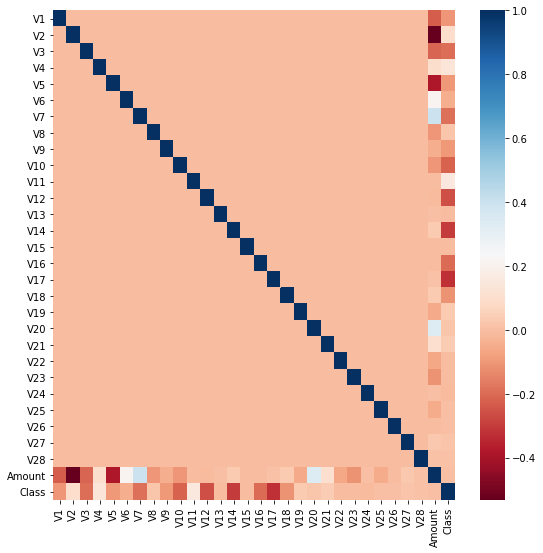

In [41]:
plt.figure(figsize=(9, 9))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')

###heatmap 분석후 특정 feature의 이상치 확인

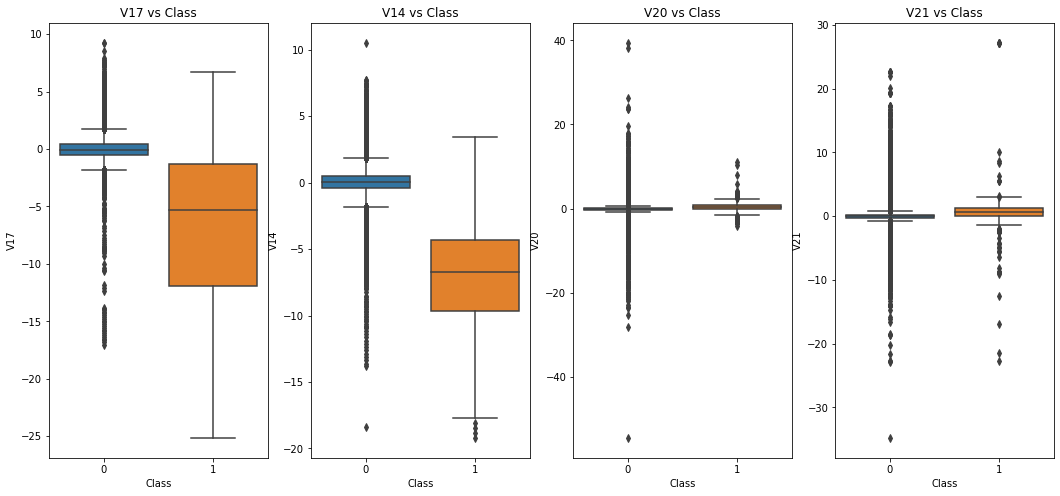

In [42]:
f, axes = plt.subplots(ncols=4, figsize=(18,8))

sns.boxplot(x="Class", y="V17", data=df,ax=axes[0])
axes[0].set_title('V17 vs Class')
sns.boxplot(x="Class", y="V14", data=df,ax=axes[1])
axes[1].set_title('V14 vs Class')
sns.boxplot(x="Class", y="V20", data=df,ax=axes[2])
axes[2].set_title('V20 vs Class')
sns.boxplot(x="Class", y="V21", data=df,ax=axes[3])
axes[3].set_title('V21 vs Class')

plt.show()

### 확인 결과 V14, V17의 데이터 분포의 이상함 감지

In [43]:
import numpy as np
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
outlier_index = get_outlier(df=df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


### V14 속성에서 이상치 데이터 확인해본 결과, 4개의 이상치 발견


In [55]:
df_v14_mean = df['V14'].mean()
print(df_v14_mean)
# for i in outlier_index:
#     df.replace(df['V14'][i], df_v14_mean)

# 이상치 데이터를 평균값으로 대체하려 했으나 평균값과 큰 편차있기때문에 데이터 수정없이 진행


print(df['V14'][8296])

1.479045358646473e-15
-19.2143254902614


### 학습 데이터와 테스트 데이터 85:15 분리

In [44]:
import numpy as np
import tensorflow as tf
np.random.seed(3)
tf.random.set_seed(3)


X = df.values[:,0:29]
Y = df.values[:,29]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.15, random_state=42)


###ANN모델링

Epoch 1/100
1211/1211 [==============================] - 2s 1ms/step - loss: 0.9631 - accuracy: 0.0757
Epoch 2/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.2074 - accuracy: 0.0401
Epoch 3/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.1083 - accuracy: 0.0668
Epoch 4/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.0661 - accuracy: 0.1867
Epoch 5/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.0429 - accuracy: 0.3770
Epoch 6/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.0326 - accuracy: 0.5701
Epoch 7/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.0266 - accuracy: 0.7096
Epoch 8/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.0215 - accuracy: 0.7877
Epoch 9/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.0152 - accuracy: 0.8534
Epoch 10/100
1211/1211 [==============================] - 1s 1ms/step - l

[0.013608182780444622, 0.9950845241546631]

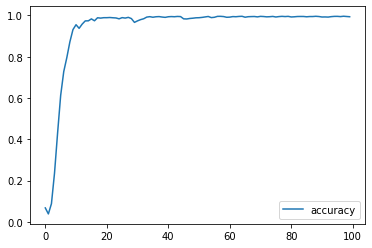

In [45]:
import matplotlib.pyplot as plt

# 모델생성 1 : 활성화 함수 relu 은닉층 하나 생성, 오차수정 함수 'adam'으로 설정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation="relu", input_dim=(X_train.shape[1])))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 100, batch_size=200, verbose=1)

plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)
# 아래 결과값을 보면 loss값이 점차 감소하며 정확도는 증가하는 것을 보실 수 있습니다.

Epoch 1/100
1211/1211 [==============================] - 1s 988us/step - loss: 0.9639 - accuracy: 0.0286
Epoch 2/100
1211/1211 [==============================] - 1s 952us/step - loss: 0.2669 - accuracy: 0.0448
Epoch 3/100
1211/1211 [==============================] - 1s 992us/step - loss: 0.1989 - accuracy: 0.1715
Epoch 4/100
1211/1211 [==============================] - 1s 971us/step - loss: 0.1796 - accuracy: 0.3230
Epoch 5/100
1211/1211 [==============================] - 1s 971us/step - loss: 0.1676 - accuracy: 0.4311
Epoch 6/100
1211/1211 [==============================] - 1s 973us/step - loss: 0.1590 - accuracy: 0.5038
Epoch 7/100
1211/1211 [==============================] - 1s 948us/step - loss: 0.1466 - accuracy: 0.5591
Epoch 8/100
1211/1211 [==============================] - 1s 1ms/step - loss: 0.1360 - accuracy: 0.5986
Epoch 9/100
1211/1211 [==============================] - 1s 989us/step - loss: 0.1351 - accuracy: 0.4379
Epoch 10/100
1211/1211 [==============================] -

[0.01886185072362423, 0.9874069690704346]

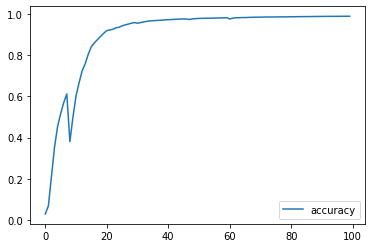

In [46]:
import matplotlib.pyplot as plt

# 모델생성 2 : 활성화 함수 relu 은닉층 하나 생성, 오차수정 함수 'sgd'으로 설정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation="relu", input_dim=(X_train.shape[1])))
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 100, batch_size=200, verbose=1)

plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)
# 'adam'과 'sgd' 결과값 비교 : 해당 그래프를 보면 'adam'이 'sgd'에 비해서 비교적 안정적인 것을 볼 수 있음. 

### DNN 모델링

Epoch 1/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.1169 - accuracy: 0.9884
Epoch 2/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 4/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 5/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 6/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 7/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 8/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 9/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 10/150
2421/2421 [==============================] - 3s 1ms/step - l

[0.01742829941213131, 0.9994148015975952]

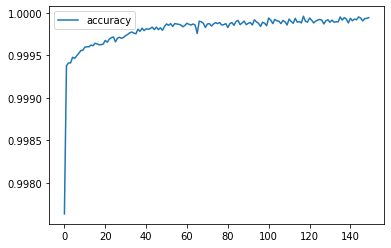

In [49]:
# 모델생성 1 : 은닉층 3개, 활성화 함수 relu, softmax 사용 epochs =23 부터 loss의 이상치가 보임.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, activation="relu", input_dim=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(52, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation ='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 150, batch_size=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)
#정확도가 처음부터 높게 나왔기때문에 오버피팅이 의심되어 다음을 진행.


Epoch 1/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0551 - accuracy: 0.9809
Epoch 2/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/150
2421/2421 [==============================] - 2s 1ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 4/150
2421/2421 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 5/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 6/150
2421/2421 [==============================] - 3s 1ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 7/150
2421/2421 [==============================] - 2s 999us/step - loss: 0.0021 - accuracy: 0.9994
Epoch 8/150
2421/2421 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/150
2421/2421 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 10/150
2421/2421 [==============================] - 3s 1ms/step -

[0.01594875566661358, 0.9994850158691406]

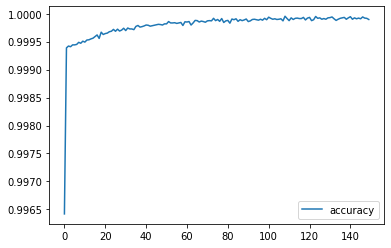

In [50]:
# 모델생성 2 : 은닉층 3개, 활성화 함수 relu, 'softmax' 대신 'sigmoid'로 바꿔 사용
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, activation="relu", input_dim=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(52, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 150, batch_size=100, verbose=1)
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)
#sotfmax 초기실행값 = loss: 0.0379 - accuracy: 0.9949
#sigmoid 초기실행값 = loss: 0.0695 - accuracy: 0.9841
#sigmoid 역시 loss값에 이상치가 발견되고 마지막 정확도가 1임.

Epoch 1/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0446 - accuracy: 0.9976
Epoch 2/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 3/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 4/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 5/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 6/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 7/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 8/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 9/150
1211/1211 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 10/150
1211/1211 [==============================] - 2s 1ms/step - l

[0.020619124174118042, 0.9994616508483887]

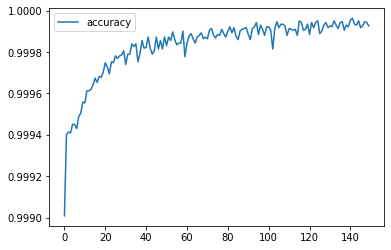

In [51]:
# 모델생성 3 : 은닉층 4개, Dense값 변경, 활성화 함수 relu, sigmoid, batch_size=100에서 200으로 수정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 150, batch_size=200, verbose=1)
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)

Epoch 1/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1782 - accuracy: 0.9152
Epoch 2/100
807/807 [==============================] - 1s 1ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 3/100
807/807 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/100
807/807 [==============================] - 1s 1ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/100
807/807 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 6/100
807/807 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 7/100
807/807 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 8/100
807/807 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 9/100
807/807 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 10/100
807/807 [==============================] - 1s 2ms/step - loss: 0.0019 - accura

[0.00764487823471427, 0.9995552897453308]

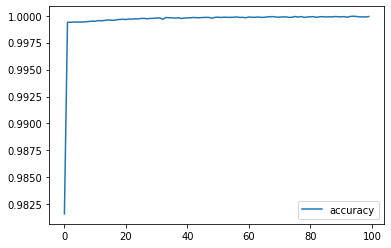

In [52]:
# 모델생성 4 : 은닉층 6개, 활성화 함수 relu, sigmoid, batch_size=200에서 300으로 수정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 150, batch_size=300, verbose=1)
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)


#머신러닝 모델 평가

###- Random forestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import warnings

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

# RandomForestClassifier 학습/예측/평가
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train , Y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

get_clf_eval(Y_test , pred, accuracy)


랜덤 포레스트 정확도: 0.9995
오차행렬
[[42646     2]
 [   18    56]]
정확도: 0.9995, 정밀도: 0.9655, 재현율: 0.7568, F1: 0.8485, AUC:0.8784


###KNN사용

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn import metrics

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, Y_train)


Y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
get_clf_eval(Y_test , Y_pred, accuracy)




오차행렬
[[42643     5]
 [   19    55]]
정확도: 0.9994, 정밀도: 0.9167, 재현율: 0.7432, F1: 0.8209, AUC:0.8716
[1. 0. 0. ... 0. 0. 0.]


### KNN모델로 예측값 평가

In [65]:
print(Y_pred[203])
print(df['Class'][203])


0.0
0
